# HMM-viterbi

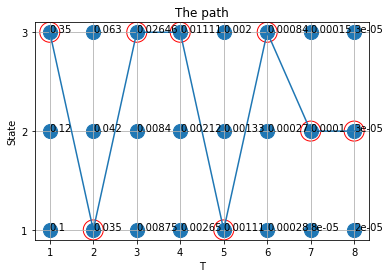

the path is: [3 1 3 3 1 3 2 2]


In [4]:
#隐马尔可夫模型--维特比算法
#模型λ = （A，B，Π）
#A=[[ 0.5  0.1  0.4],
#  [  0.3  0.5  0.2],
#  [ 0.2  0.2  0.6]]
#B=[[0.5 0.5],
#   [0.4 0.6],
#   [0.7 0.3]]
#第一列概率为：观测为红球的概率
#第二列概率为：观测为白球的概率
#Π = （0.2， 0.3， 0.5）T
import numpy as np
from path_show import path_show

A = np.array([[0.5,0.1,0.4],[0.3,0.5,0.2],[0.2,0.2,0.6]])
B = np.array([[0.5,0.5],[0.4,0.6],[0.7,0.3]])
pi = np.array([0.2,0.3,0.5])
#观测状态0代表红，1代表白
O  = [0,1,0,0,1,0,1,1]
class Viterbi(object):

    def __init__(self,A,B,pi,O):
        self.A = A
        self.B = B
        self.pi =pi
        self.O = O
        #状态个数
        self.N = np.shape(A)[0]
        #序列数目
        self.T = np.shape(O)[0]
        #储存路径概率最大值
        self.delta = np.zeros([self.T,self.N])
        #最大概率路径对应的节点
        #self.Psi = self.T*[self.N*[0]]
        self.Psi = np.zeros([self.T,self.N],dtype=int)
        self.i_star = np.zeros(self.T,dtype=int)
        self.P_star = 0.0

    def compute(self):
        for t in range(self.T):
            # 从状态观测矩阵中取观测状态
            obseration = self.O[t]
            #初始化
            if t==0:
                for cur_state in range(self.N):
                    self.delta[t][cur_state] = self.pi[cur_state]*self.B[cur_state][obseration]
                    self.Psi[t][cur_state] = 0
            else:
                for cur_state in range(self.N):
                    self.delta[t][cur_state] = np.max([self.delta[t-1][pre_state]*self.A[pre_state][cur_state]*self.B[cur_state][obseration]
                                                       for pre_state in range(self.N)])
                    Psi = [self.delta[t-1][pre_state]*self.A[pre_state][cur_state] for pre_state in range(self.N)]

                    self.Psi[t][cur_state] = np.argmax(Psi)

        self.P_star = np.max([self.delta[self.T-1][cur_state] for cur_state in range(self.N)])
        self.i_star[self.T-1] = np.argmax([self.delta[self.T-1][cur_state] for cur_state in range(self.N)])

        for t in range(self.T-1):
            self.i_star[t] = self.Psi[t+1][self.i_star[t+1]]
        self.i_star = self.i_star + 1

        return self.i_star


if __name__ == '__main__':
    viterbi = Viterbi(A,B,pi,O)
    i_star = viterbi.compute()
    show = path_show(viterbi.T,viterbi.N,viterbi.delta,viterbi.i_star)
    show.state_scatter()
    show.show()
    print("the path is: {}".format(i_star))

